EQE512 MATRIX METHODS IN STRUCTURAL ANALYSIS 

---
<h3 align="center"><font color = red >Week 10 - OpenSeesPy - Frame Systems - InClass </font></h3> 

<h4 align="center">Dr. Ahmet Anıl Dindar (adindar@gtu.edu.tr)</h3> 
<h4 align="center">2020 Fall  </h4> 

---

This code is composed of three sections, namely 

A. Pre-process

B. Process

C. Post-Process

---

Problem: This is a multistory 2D Elastic RC frame under static loads

# A. Pre-Process

In [378]:
import openseespy.opensees as ops

In [379]:
# Clear all variables inthe domain
ops.wipe()

In [380]:
# Define the degree of freedom and model
ops.model("Basic","-ndm",2 , "-ndf" , 3)

In [381]:
numBay = 1 # Two beams at each floor 
numFloor = 3 # Seven stories building

In [382]:
bayWidth = 3.0 # m
storyHeight = 3.0 # m

In [383]:
E = 29_500_500 # kN/m2
massX = 0.49 # units must be consistent
M = 0. # Lookout for the value below !!!!!!
massType = "-lmass" # Lumped Mass required in OpenSees

In [384]:
# Members in the system
beams = [ "B20X50" for item in range( numFloor)] # List 
eColumn = [ "C50X50" for item in range( numFloor)]
icolumn = [ "C50X50" for item in range( numFloor)]

columns = [ eColumn, iColumn, eColumn]
columns = [ eColumn, eColumn]

In [385]:
# Sections of the members
Section = { "C50X50": [ 0.5*0.5 , round( (0.5 * 0.5**3)/12, 5) ],
          "B20X50" : [0.2*.5 , round( (0.2* 0.5**3)/12,5)]}

In [386]:
Section

{'C50X50': [0.25, 0.00521], 'B20X50': [0.1, 0.00208]}

In [387]:
# Create a Function in Definition of the Members

def ElasticBeamColumn( eleTag, iNode, jNode, secType, E , transfTag , M , MassType):
    prop = Section[ secType]
    Area = prop[0]
    I = prop[1]
    
    # OpenSees command in creation of the member
    ops.element( "elasticBeamColumn" , eleTag, iNode, jNode, secType, E , transfTag , "-mass" , M , MassType)

**Geometry**

In [388]:
import numpy as np
axis_h = np.linspace( 0 , (numBay * bayWidth) , numBay + 1 )
axis_v = np.linspace( 0 , (numFloor * storyHeight) , numFloor + 1 )

In [389]:
node_no =  1 
node_dict={}
floorNo = 0
floorNodes = {}
nodes = []

for i in axis_v:
    floorNodes[ floorNo] = []
    
    for j in axis_h:
        nodes.append( node_no)
        
        ops.node( node_no  , float(j) , float(i))
        
        node_dict[node_no] = [float(j) , float(i)]
        floorNodes[ floorNo].append( node_no)
        
        node_no += 1
    floorNo += 1

In [390]:
node_dict

{1: [0.0, 0.0],
 2: [3.0, 0.0],
 3: [0.0, 3.0],
 4: [3.0, 3.0],
 5: [0.0, 6.0],
 6: [3.0, 6.0],
 7: [0.0, 9.0],
 8: [3.0, 9.0]}

In [391]:
floorNodes

{0: [1, 2], 1: [3, 4], 2: [5, 6], 3: [7, 8]}

In [392]:
# Boundary Conditions
for nodeNumber in floorNodes[0]:
    ops.fix( nodeNumber , 1 , 1 , 1)

In [393]:
# Rigid Diaphram Assignments
for key , value in floorNodes.items():
    for item in value[:] :
        if item == value[0]:
            ops.mass( item , massX , 0.0000001 , 0.000001)
        else:
            ops.equalDOF( value[0] , item , 1)

In [394]:
# Place the columns

ops.geomTransf( coordTransfer , 1)
column_dict ={}
eleTag = 1
for j in range(0 , numBay + 1):
    end1 = j+1
    end2 = end1 + numBay + 1
    thisColumn = columns[ j ]
    
    for i in range( 0 , numFloor):
        secType = thisColumn[i]
        ElasticBeamColum( eleTag , end1 , end2 , secType , E , 1 , M , massType)

        column_dict[eleTag] = [end1 , end2]
        
        end1 = end2
        
        end2 += numBay + 1
         
        eleTag += 1

In [395]:
eleTag

7

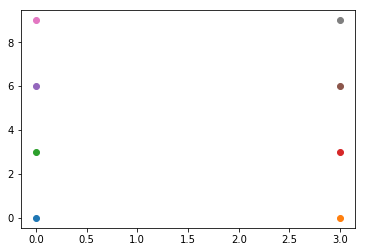

In [396]:
import matplotlib.pyplot as plt

for key in node_dict.keys():
    plt.plot( node_dict[key][0] ,  node_dict[key][1] , "o")

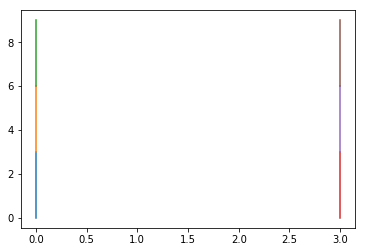

In [397]:
for key in column_dict.keys():
    plt.plot([ node_dict[column_dict[key][0]][0] ,node_dict[column_dict[key][1]][0]],
              [ node_dict[column_dict[key][0]][1] ,node_dict[column_dict[key][1]][1]]  )


In [398]:
# Place the beams
beam_dict = {}

for j in range(1 , numFloor + 1 ) :
    end1 = (numBay + 1)*j + 1
    end2 = end1 + 1
    secType = beams[j - 1]
    for i in range( 0, numBay):
        ElasticBeamColum(eleTag , end1 , end2 , secType , E , 1 , M , massType )
        
        beam_dict[eleTag] = [end1, end2]
        
        end1 = end2
        
        end2 = end1 + 1
        
        eleTag += 1

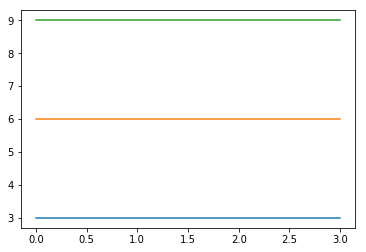

In [399]:
for key in beam_dict.keys():
    plt.plot([ node_dict[beam_dict[key][0]][0] ,node_dict[beam_dict[key][1]][0]],
              [ node_dict[beam_dict[key][0]][1] ,node_dict[beam_dict[key][1]][1]]  )


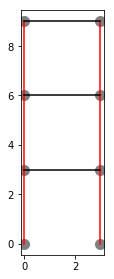

In [400]:
scale_figure = 1.5
plt.figure( figsize = (scale_figure * numBay , scale_figure * numFloor))

for key in node_dict.keys() :
    plt.plot( node_dict[key][0] , node_dict[key][1] , "o", MS = 10 , color = "gray")
for key in column_dict.keys():
    plt.plot( [ node_dict[column_dict[key][0]][0] ,node_dict[column_dict[key][1]][0]],
              [ node_dict[column_dict[key][0]][1] ,node_dict[column_dict[key][1]][1]],
            color = "red")
    
for key in beam_dict.keys():
    plt.plot([ node_dict[beam_dict[key][0]][0] ,node_dict[beam_dict[key][1]][0]],
              [ node_dict[beam_dict[key][0]][1] ,node_dict[beam_dict[key][1]][1]] , color = "black" )


In [401]:
# Dynamic properties - Modal Analysis - Free Vibration Analysis
from math import asin, sqrt

numEigen = numFloor

eigenValues = ops.eigen( numEigen)

PI = 22 / 7

In [402]:
eigenValues

[14169.844990005586, 183405.92995474653, 715415.9953641712]

**Loads**

In [403]:
ops.timeSeries( "Linear", 1)
ops.pattern( "Plain" , 1 , 1)
load_dict = { 4 : 20_000, 7: 20_000} # Change these values as you wish
load_dict = { 4 : 40_000} # Change these values as you wish

for key in load_dict.keys():
    ops.load( key ,load_dict[key] , 0 ,0 )

# B. Process

In [404]:
ops.integrator( "LoadControl", 1.0)
ops.algorithm("Linear")
ops.analysis("Static")
ops.analyze(1)

0

# C. Post-Process

In [405]:
node_dict[1][0]

0.0

In [406]:
node_deform_dict = {}

for i in node_dict.keys():
    node_deform_dict[i] = [node_dict[i][0] + ops.nodeDisp(i,1) , 
                           node_dict[i][1] + ops.nodeDisp(i,2)]

In [407]:
node_deform_dict

{1: [0.0, 0.0],
 2: [3.0, 0.0],
 3: [0.5092878347518897, 3.0061301366744746],
 4: [3.5092878347518894, 2.9938698633255254],
 5: [0.78438602424707, 6.007592753424022],
 6: [3.78438602424707, 5.992407246575978],
 7: [0.8658258520260309, 9.007923843455881],
 8: [3.865825852026031, 8.992076156544119]}

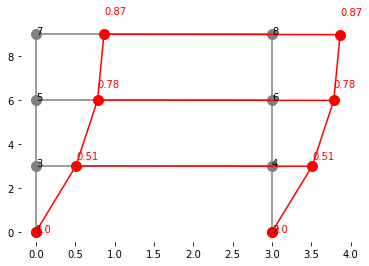

In [408]:
for key in node_dict.keys() :
    plt.plot( node_dict[key][0] , node_dict[key][1] , "o", MS = 10 , color = "gray")
for key in column_dict.keys():
    plt.plot( [ node_dict[column_dict[key][0]][0] ,node_dict[column_dict[key][1]][0]],
              [ node_dict[column_dict[key][0]][1] ,node_dict[column_dict[key][1]][1]],
            color = "gray")
for key in node_dict.keys() :
    plt.text( node_dict[key][0] , node_dict[key][1] , key)

for key in node_dict.keys() :
    plt.text( node_deform_dict[key][0] , 1.1 * node_deform_dict[key][1] , round( ops.nodeDisp(key,1),2) ,color="red" )
    
    
    
for key in beam_dict.keys():
    plt.plot([ node_dict[beam_dict[key][0]][0] ,node_dict[beam_dict[key][1]][0]],
              [ node_dict[beam_dict[key][0]][1] ,node_dict[beam_dict[key][1]][1]] , color = "gray" )
    
for key in node_deform_dict.keys() :
    plt.plot( node_deform_dict[key][0] , node_deform_dict[key][1] , "o", MS = 10 , color = "red")
for key in column_dict.keys():
    plt.plot( [ node_deform_dict[column_dict[key][0]][0] ,node_deform_dict[column_dict[key][1]][0]],
              [ node_deform_dict[column_dict[key][0]][1] ,node_deform_dict[column_dict[key][1]][1]],
            color = "red")
    
for key in beam_dict.keys():
    plt.plot([ node_deform_dict[beam_dict[key][0]][0] ,node_deform_dict[beam_dict[key][1]][0]],
              [ node_deform_dict[beam_dict[key][0]][1] ,node_deform_dict[beam_dict[key][1]][1]] , color = "red" )   
plt.box(False)

**Modal Analysis Results**

In [410]:
[ print(f"{mode+1} mode number and period is {round(2*PI / sqrt(lamb),3)}sec")  for mode , lamb in enumerate( eigenValues)];

1 mode number and period is 0.053sec
2 mode number and period is 0.015sec
3 mode number and period is 0.007sec
